In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
tf.set_random_seed(777)

In [2]:
# get mnist data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
# feature & class dimensions
n_features = 28 * 28
n_classes = 10

In [4]:
# input place holders
X = tf.placeholder(tf.float32, [None, n_features])
Y = tf.placeholder(tf.float32, [None, n_classes])
learning_rate = tf.placeholder(tf.float32, name='learning_rate')

# dropout (keep_prob) rate  0.7 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32, name='keep_prob')

## define single layer

In [5]:
def build_single_layer(n_features, n_classes, X, Y, learning_rate):    
    # weights & bias for nn layers
    W = tf.Variable(tf.random_normal([n_features, n_classes]), name='weight')
    b = tf.Variable(tf.random_normal([n_classes]), name='bias')
    
    # out hypothesis
    hypothesis = tf.matmul(X, W) + b
    
    # define cost/loss & optimizer
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    return hypothesis, cost, optimizer

## define multi-layer

In [6]:
def build_multi_layer(n_features, n_classes, X, Y, learning_rate):    
    # weights & bias for nn layers
    W1 = tf.Variable(tf.random_normal([n_features, 256]))
    b1 = tf.Variable(tf.random_normal([256]))
    L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

    W2 = tf.Variable(tf.random_normal([256, 256]))
    b2 = tf.Variable(tf.random_normal([256]))
    L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

    W3 = tf.Variable(tf.random_normal([256, n_classes]))
    b3 = tf.Variable(tf.random_normal([n_classes]))
    
    # out hypothesis
    hypothesis = tf.matmul(L2, W3) + b3
    
    # define cost/loss & optimizer
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    return hypothesis, cost, optimizer

## define multi-layer with Xavier initializer

In [7]:
def build_multi_layer_Xavier(n_features, n_classes, X, Y, learning_rate):    
    # weights & bias for nn layers
    W1 = tf.get_variable("W1", shape=[n_features, 256], initializer=tf.contrib.layers.xavier_initializer())
    b1 = tf.Variable(tf.random_normal([256]))
    L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

    W2 = tf.get_variable("W2", shape=[256, 256], initializer=tf.contrib.layers.xavier_initializer())
    b2 = tf.Variable(tf.random_normal([256]))
    L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

    W3 = tf.get_variable("W3", shape=[256, n_classes], initializer=tf.contrib.layers.xavier_initializer())
    b3 = tf.Variable(tf.random_normal([n_classes]))
    
    # out hypothesis
    hypothesis = tf.matmul(L2, W3) + b3
    
    # define cost/loss & optimizer
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    return hypothesis, cost, optimizer

## define Deep Neural Networks

In [8]:
def build_DNN_layer_Xavier(n_features, n_classes, X, Y, learning_rate):    
    # weights & bias for nn layers
    W1 = tf.get_variable("W1", shape=[n_features, 512], initializer=tf.contrib.layers.xavier_initializer())
    b1 = tf.Variable(tf.random_normal([512]))
    L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

    W2 = tf.get_variable("W2", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
    b2 = tf.Variable(tf.random_normal([512]))
    L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

    W3 = tf.get_variable("W3", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
    b3 = tf.Variable(tf.random_normal([512]))
    L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)

    W4 = tf.get_variable("W4", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
    b4 = tf.Variable(tf.random_normal([512]))
    L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)

    W5 = tf.get_variable("W5", shape=[512, n_classes], initializer=tf.contrib.layers.xavier_initializer())
    b5 = tf.Variable(tf.random_normal([n_classes]))

    # out hypothesis
    hypothesis = tf.matmul(L4, W5) + b5
    
    # define cost/loss & optimizer
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    return hypothesis, cost, optimizer

## define DNN with drop-out

In [9]:
def build_DNN_layer_Xavier_dropout(n_features, n_classes, X, Y, learning_rate, keep_prob):    
    # weights & bias for nn layers
    W1 = tf.get_variable("W1", shape=[n_features, 512], initializer=tf.contrib.layers.xavier_initializer())
    b1 = tf.Variable(tf.random_normal([512]))
    L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
    L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

    W2 = tf.get_variable("W2", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
    b2 = tf.Variable(tf.random_normal([512]))
    L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
    L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

    W3 = tf.get_variable("W3", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
    b3 = tf.Variable(tf.random_normal([512]))
    L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
    L3 = tf.nn.dropout(L3, keep_prob=keep_prob)

    W4 = tf.get_variable("W4", shape=[512, 512], initializer=tf.contrib.layers.xavier_initializer())
    b4 = tf.Variable(tf.random_normal([512]))
    L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
    L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

    W5 = tf.get_variable("W5", shape=[512, n_classes], initializer=tf.contrib.layers.xavier_initializer())
    b5 = tf.Variable(tf.random_normal([n_classes]))

    # out hypothesis
    hypothesis = tf.matmul(L4, W5) + b5
    
    # define cost/loss & optimizer
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    return hypothesis, cost, optimizer

In [10]:
# parameters
lr = 0.001 # learning_rate
kp = 0.7 # keep_prob
training_epochs = 15
batch_size = 100

In [11]:
# select what kind of nn to use
# hypothesis, cost, optimizer = build_single_layer(n_features, n_classes, X, Y, learning_rate) # test acc: 0.89
# hypothesis, cost, optimizer = build_multi_layer(n_features, n_classes, X, Y, learning_rate) # test acc: 0.90
# hypothesis, cost, optimizer = build_multi_layer_Xavier(n_features, n_classes, X, Y, learning_rate) # test acc: 0.97
# hypothesis, cost, optimizer = build_DNN_layer_Xavier(n_features, n_classes, X, Y, learning_rate) # test acc: 0.98
hypothesis, cost, optimizer = build_DNN_layer_Xavier_dropout(n_features, n_classes, X, Y, learning_rate, keep_prob) # test acc: 0.98

Epoch: 0001 cost = 0.448471501
Epoch: 0002 cost = 0.173111820
Epoch: 0003 cost = 0.129690169
Epoch: 0004 cost = 0.107324867
Epoch: 0005 cost = 0.095596550
Epoch: 0006 cost = 0.080282506
Epoch: 0007 cost = 0.074212629
Epoch: 0008 cost = 0.067507604
Epoch: 0009 cost = 0.063255913
Epoch: 0010 cost = 0.059632673
Epoch: 0011 cost = 0.058608223
Epoch: 0012 cost = 0.052385167
Epoch: 0013 cost = 0.051235983
Epoch: 0014 cost = 0.046335729
Epoch: 0015 cost = 0.045655064
Learning Finished!
Test set accuracy: 0.9824
Label:  [5]
Single prediction:  [5]


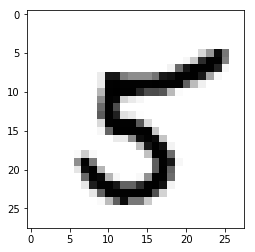

In [12]:
# start training single layer
with tf.Session() as sess:
    # initialize
    sess.run(tf.global_variables_initializer())
    
    # train my model
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            feed_dict = {X: batch_xs, Y: batch_ys, learning_rate: lr, keep_prob: kp}
            c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
            avg_cost += c / total_batch

        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

    print('Learning Finished!')
    
    # Test model and check accuracy
    correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print('Test set accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1.0}))
    
    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Single prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1.0}))

    plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()